In [1]:
#Name: Domala Vamshikrishna
#Date:03-06-2022
#Model: KNN
#station:51000
#Wave height Prediction

In [2]:
import csv
import numpy as np
import folium
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
train = pd.read_excel("51000_Training.xlsx")

In [5]:
train

,Date,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP
0,2016-01-01 00:00:00,253,1.9,3.4,3.17,13.79,9.94,304,1016.3,23.3,24.8
1,2016-01-01 01:00:00,286,1.6,2.9,3.12,14.81,9.91,305,1016.7,23.4,24.8
2,2016-01-01 02:00:00,277,3.3,4.8,3.21,14.81,10.41,314,1017.0,23.4,24.7
3,2016-01-01 03:00:00,270,2.7,4.2,2.80,14.81,9.36,308,1017.4,23.0,24.6
4,2016-01-01 04:00:00,282,3.0,4.9,3.05,14.81,10.16,315,1018.0,23.0,24.5
...,...,...,...,...,...,...,...,...,...,...,...
43843,2020-12-31 19:00:00,75,6.4,8.9,3.39,14.81,8.17,308,1023.4,23.3,24.6
43844,2020-12-31 20:00:00,82,7.2,10.3,3.18,14.81,8.15,291,1023.3,22.9,24.7
43845,2020-12-31 21:00:00,68,7.3,9.1,3.03,14.81,8.16,289,1022.7,23.3,24.7
43846,2020-12-31 22:00:00,51,7.9,9.7,3.19,14.81,8.31,285,1021.4,23.2,24.7


In [6]:
corr=train.corr(method='pearson')
corr

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP
WDIR,1.000000,-0.221620,-0.195634,0.107652,0.151970,0.257408,0.196383,-0.360266,-0.121480,-0.141982
WSPD,-0.221620,1.000000,0.985963,0.318986,-0.204657,-0.376017,-0.229573,0.180643,-0.060809,-0.112867
GST,-0.195634,0.985963,1.000000,0.380399,-0.173383,-0.317003,-0.202249,0.176253,-0.102116,-0.130844
WVHT,0.107652,0.318986,0.380399,1.000000,0.400906,0.644856,0.260593,0.037996,-0.447550,-0.413764
DPD,0.151970,-0.204657,-0.173383,0.400906,1.000000,0.674681,0.631863,-0.001235,-0.259294,-0.252758
APD,0.257408,-0.376017,-0.317003,0.644856,0.674681,1.000000,0.518790,-0.068922,-0.356615,-0.311897
MWD,0.196383,-0.229573,-0.202249,0.260593,0.631863,0.518790,1.000000,-0.017145,-0.272113,-0.250354
PRES,-0.360266,0.180643,0.176253,0.037996,-0.001235,-0.068922,-0.017145,1.000000,-0.089333,-0.130096
ATMP,-0.121480,-0.060809,-0.102116,-0.447550,-0.259294,-0.356615,-0.272113,-0.089333,1.000000,0.872130
WTMP,-0.141982,-0.112867,-0.130844,-0.413764,-0.252758,-0.311897,-0.250354,-0.130096,0.872130,1.000000


In [7]:
#corr.to_excel('41047_Pearson_corelation.xlsx')

'‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, \n ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, \n ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, \n ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, \n ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, \n ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, \n ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, \n ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, \n ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, \n ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’,\n ‘cubehelix’, ‘cu

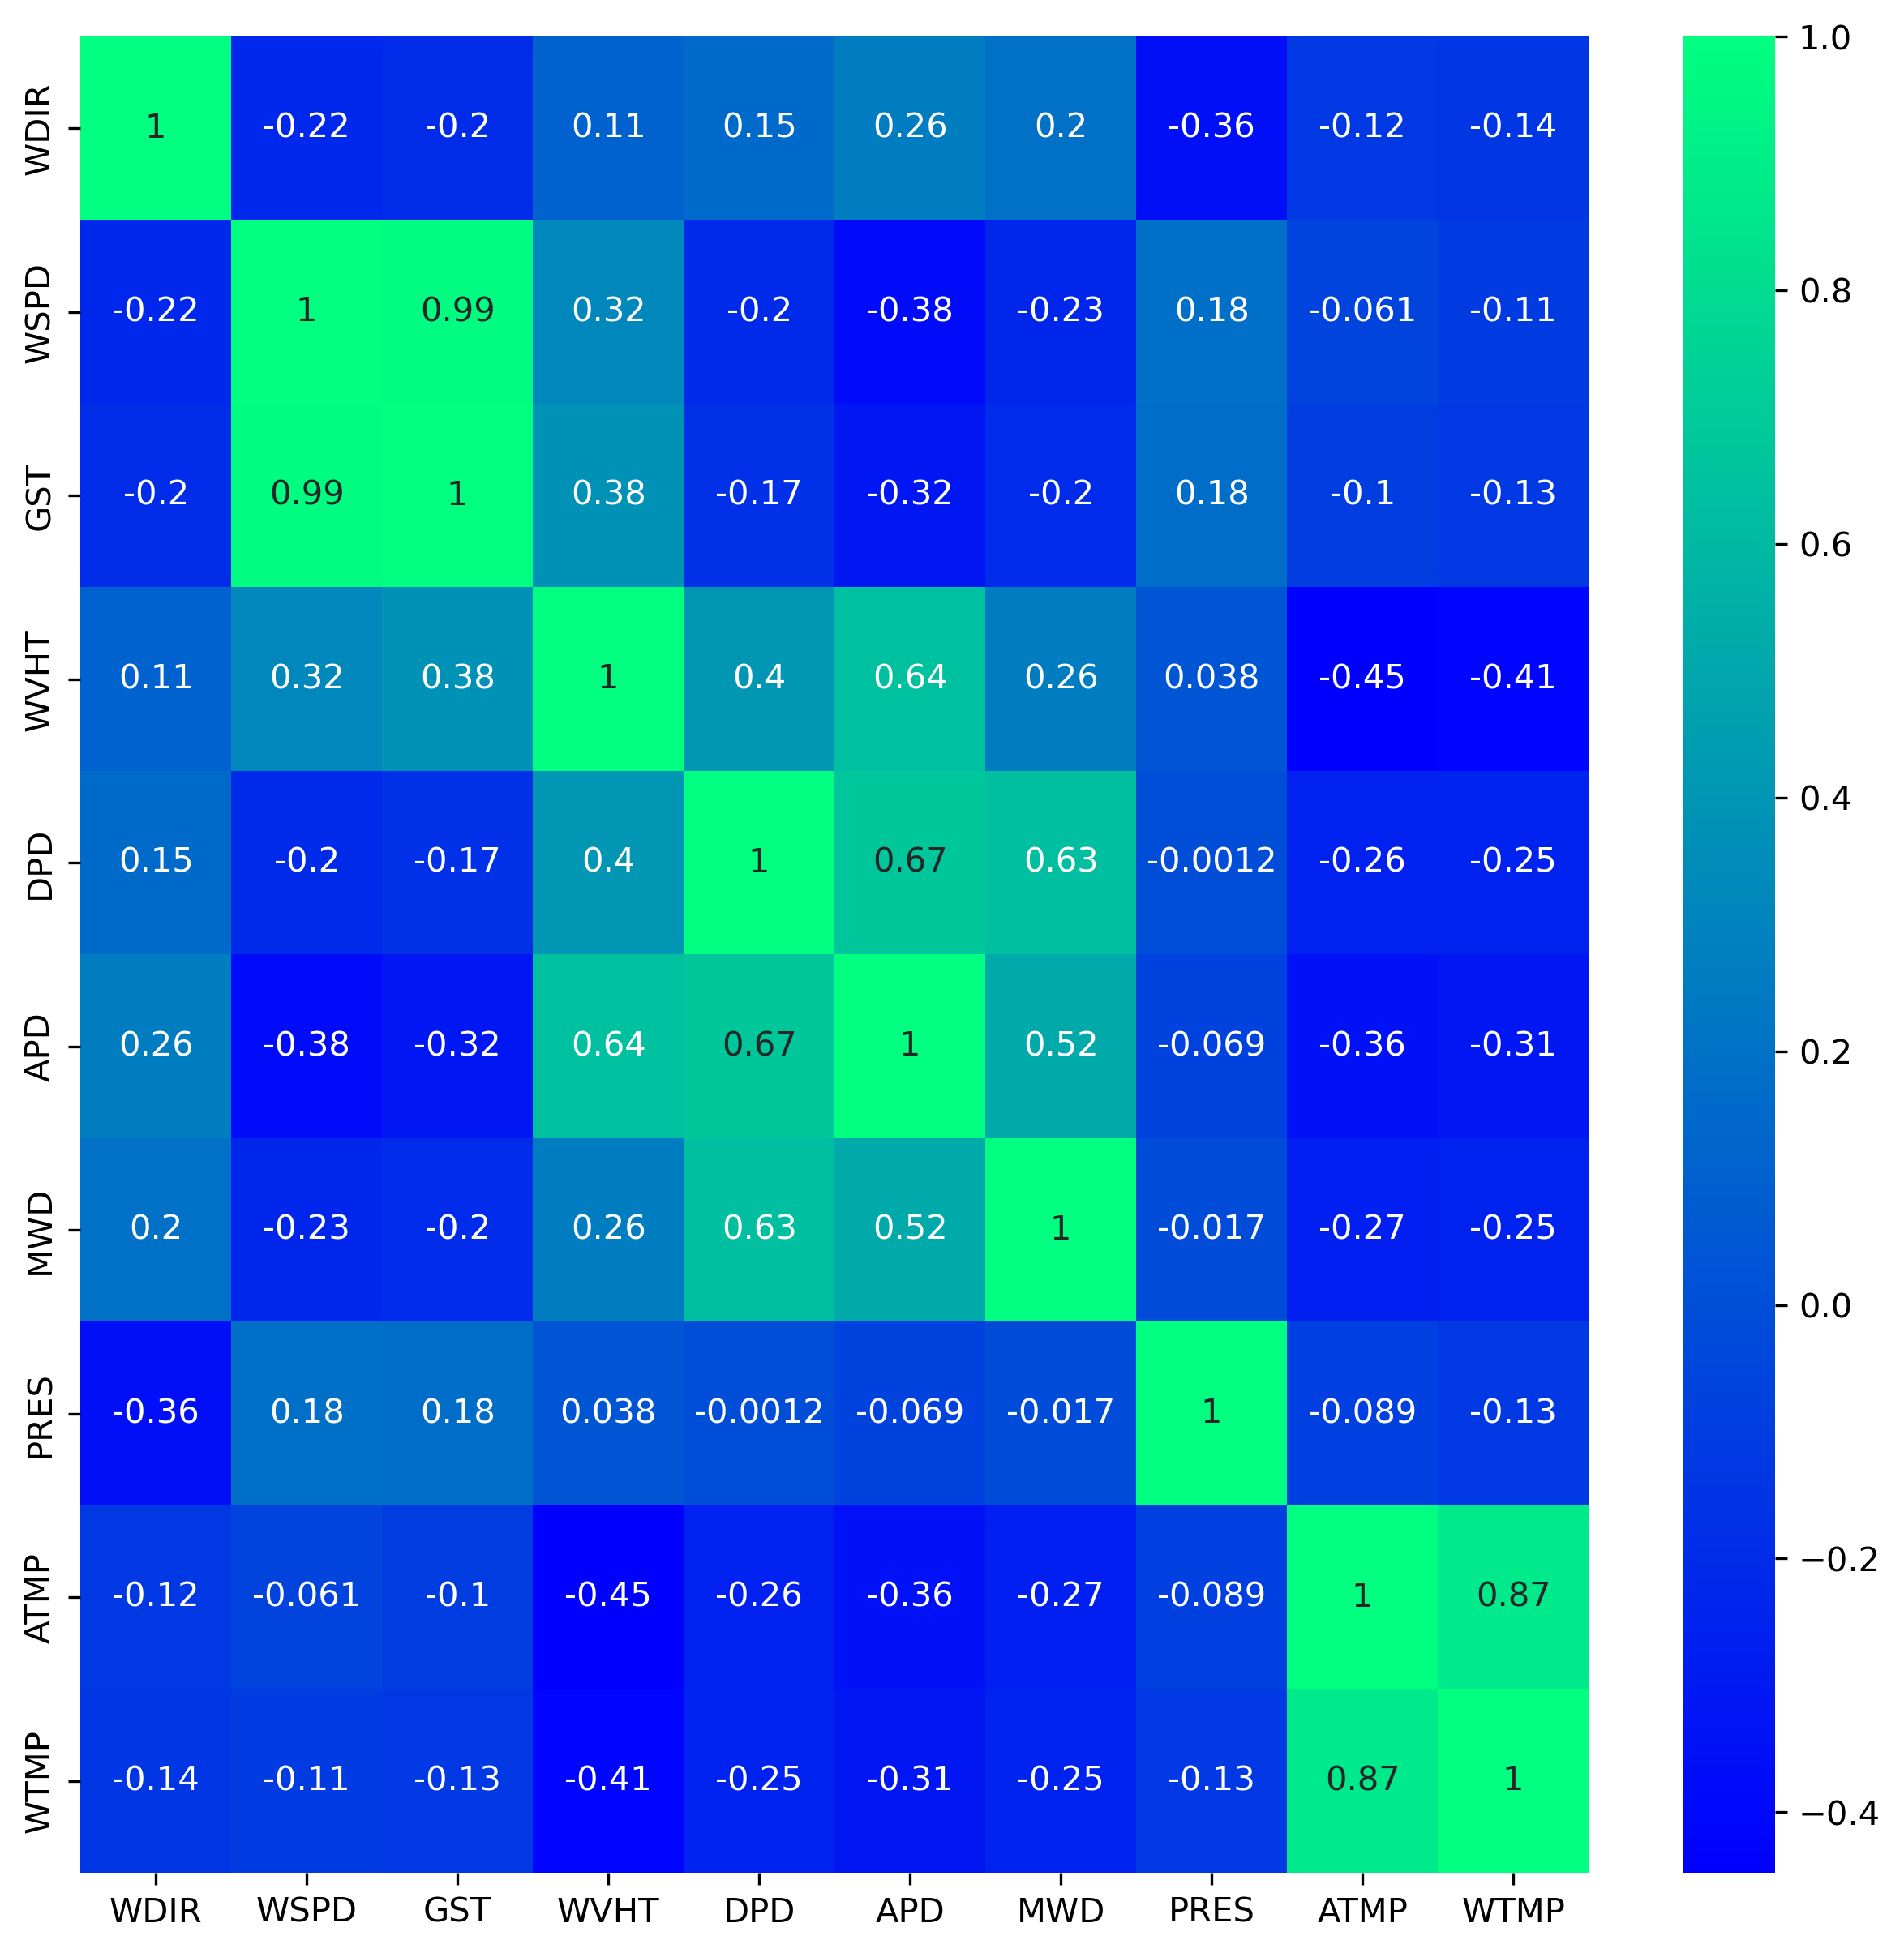

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10),dpi=300)
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="winter")
plt.savefig("Correlation.jpeg", bbox_inches='tight')
"""‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, 
 ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, 
 ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, 
 ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, 
 ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, 
 ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, 
 ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, 
 ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, 
 ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, 
 ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’,
 ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’,
 ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, 
 ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’,
 ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, 
 ‘inferno_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, 
 ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’,
 ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’,
 ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’,
 ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’,
 ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘twilight’,
 ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’]"""

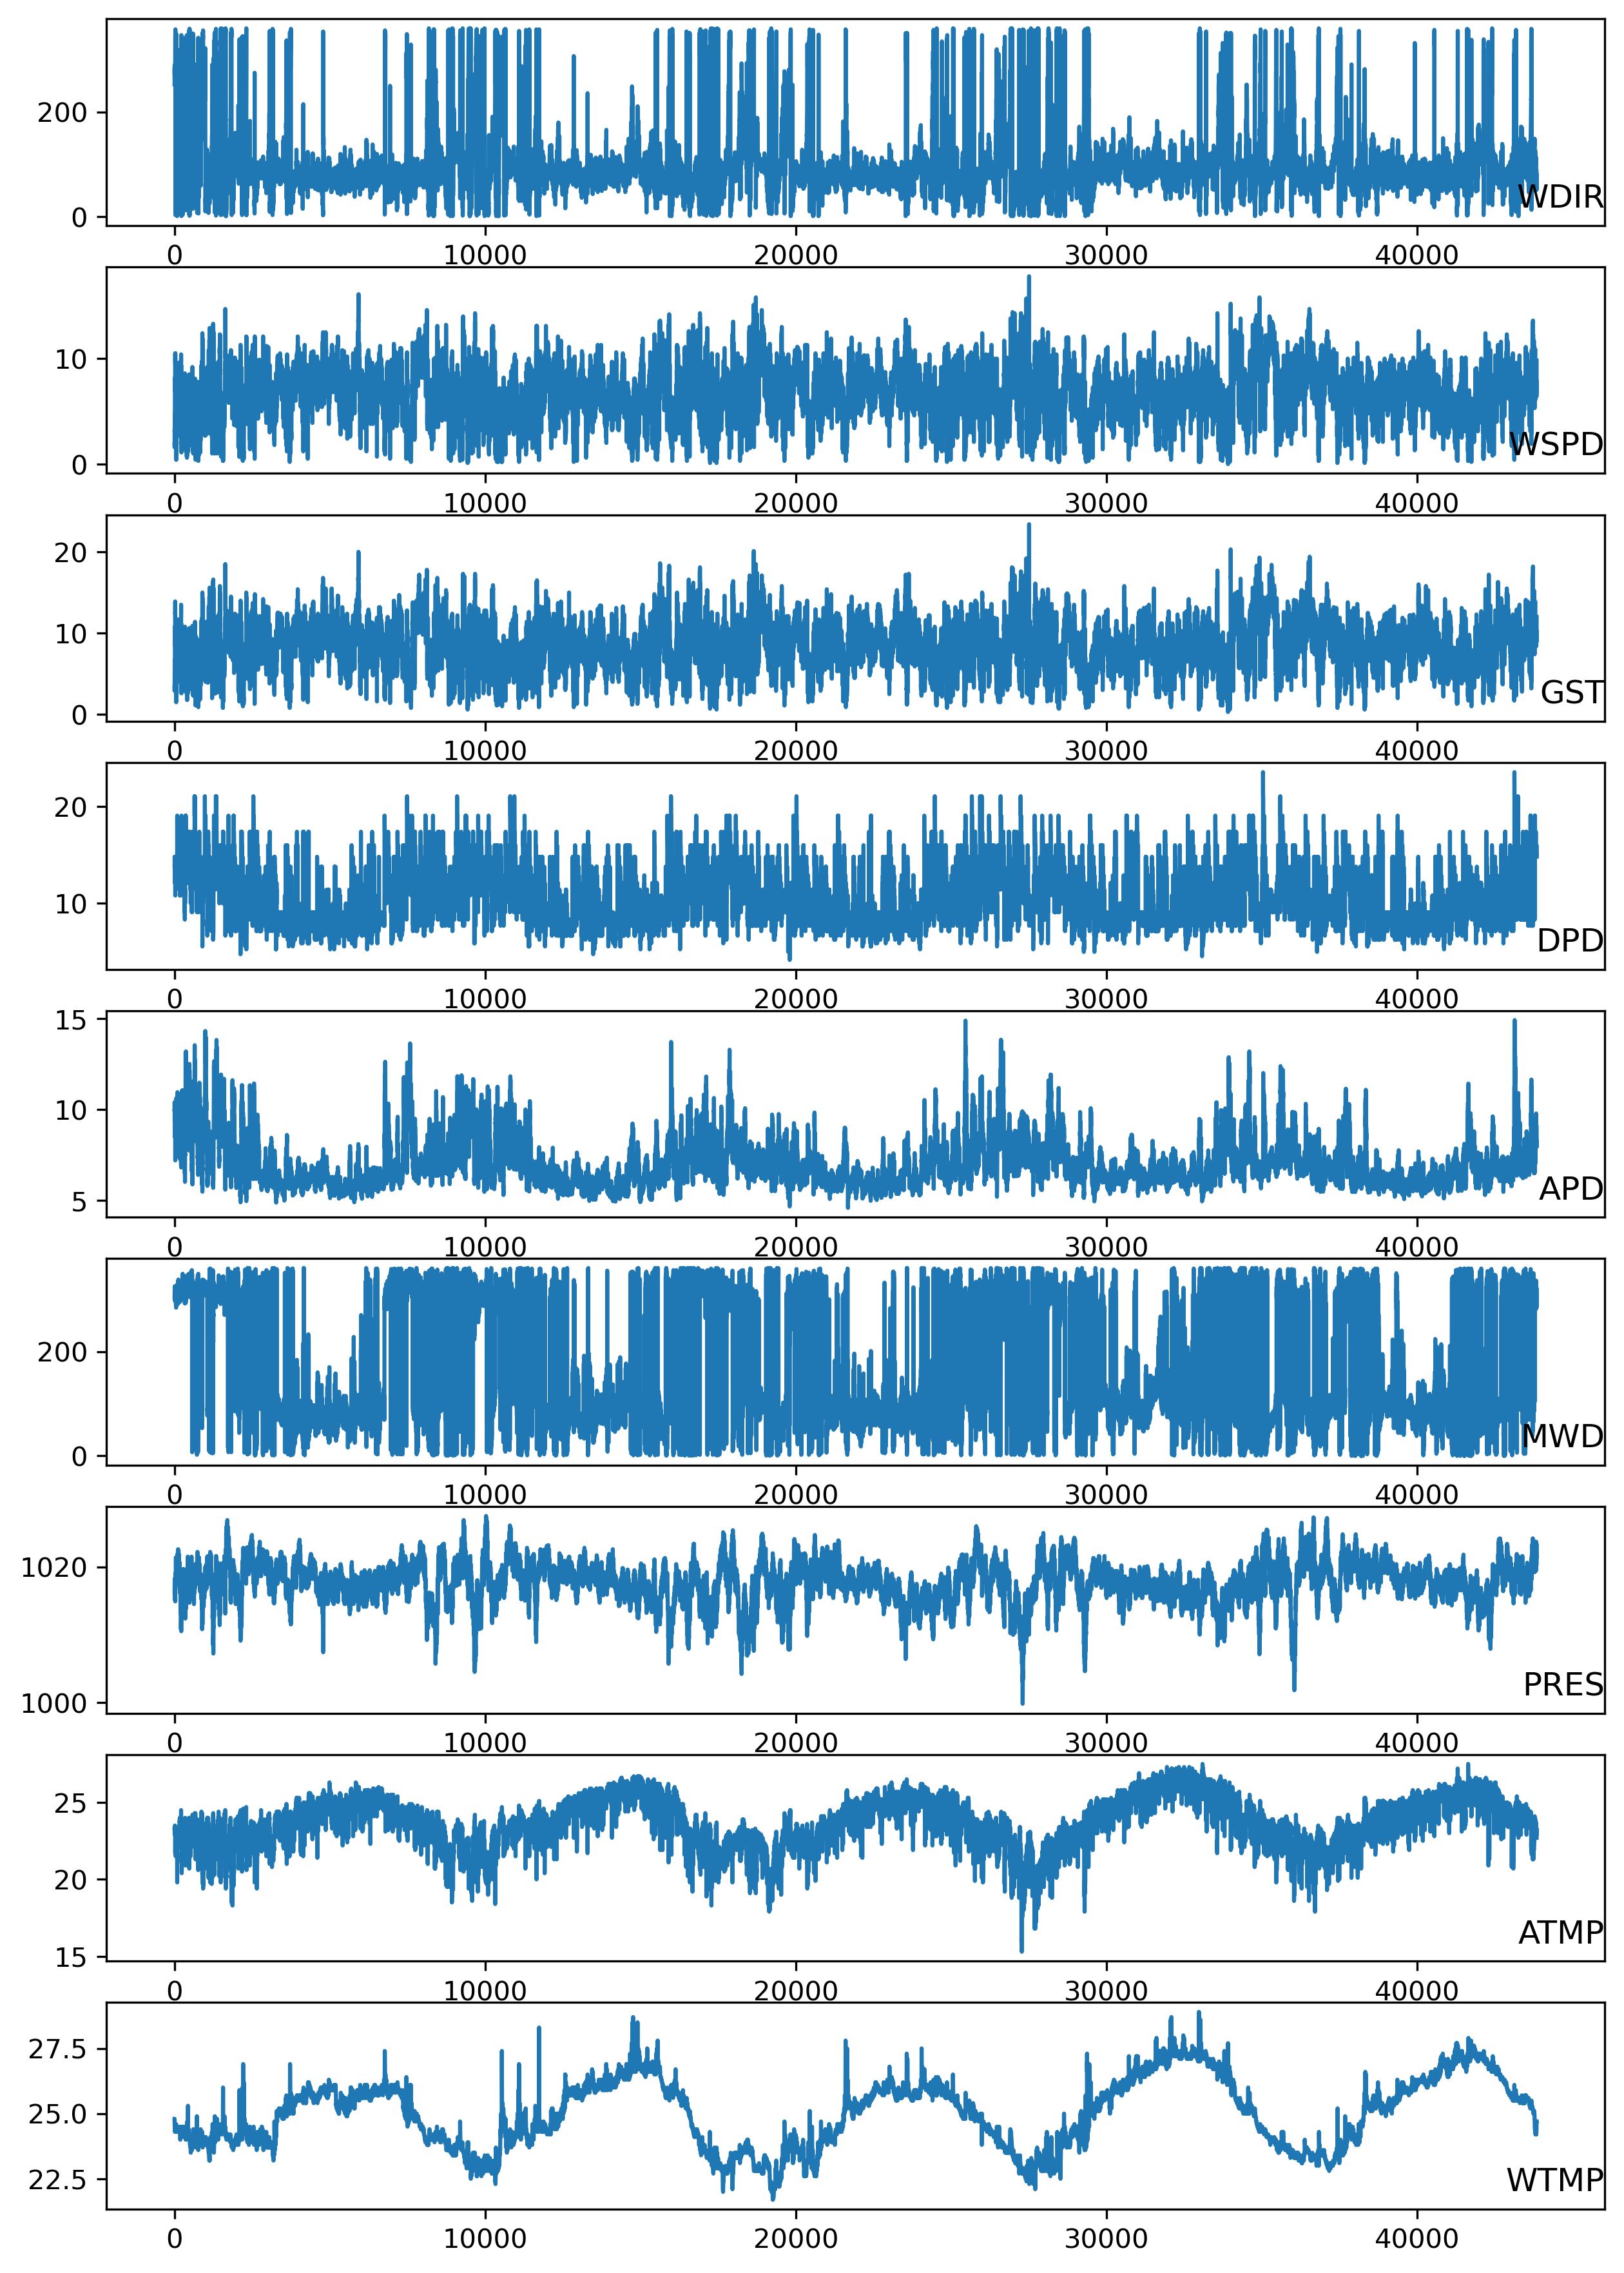

In [9]:
values = train.values
# specify columns to plot
groups = [ 1, 2, 3, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
plt.figure(figsize=(10, 15), dpi=300)
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(train.columns[group], y=0.01, loc='right')
	i += 1
plt.show()

In [17]:
Xtrain = train.iloc[:,[2,3,5,6]]
ytrain = train.iloc[:,4]

In [18]:
test=pd.read_excel("51000_Testing.xlsx")
Xtest=test.iloc[:,[2,3,5,6]]
ytest=test.iloc[:,[4]]

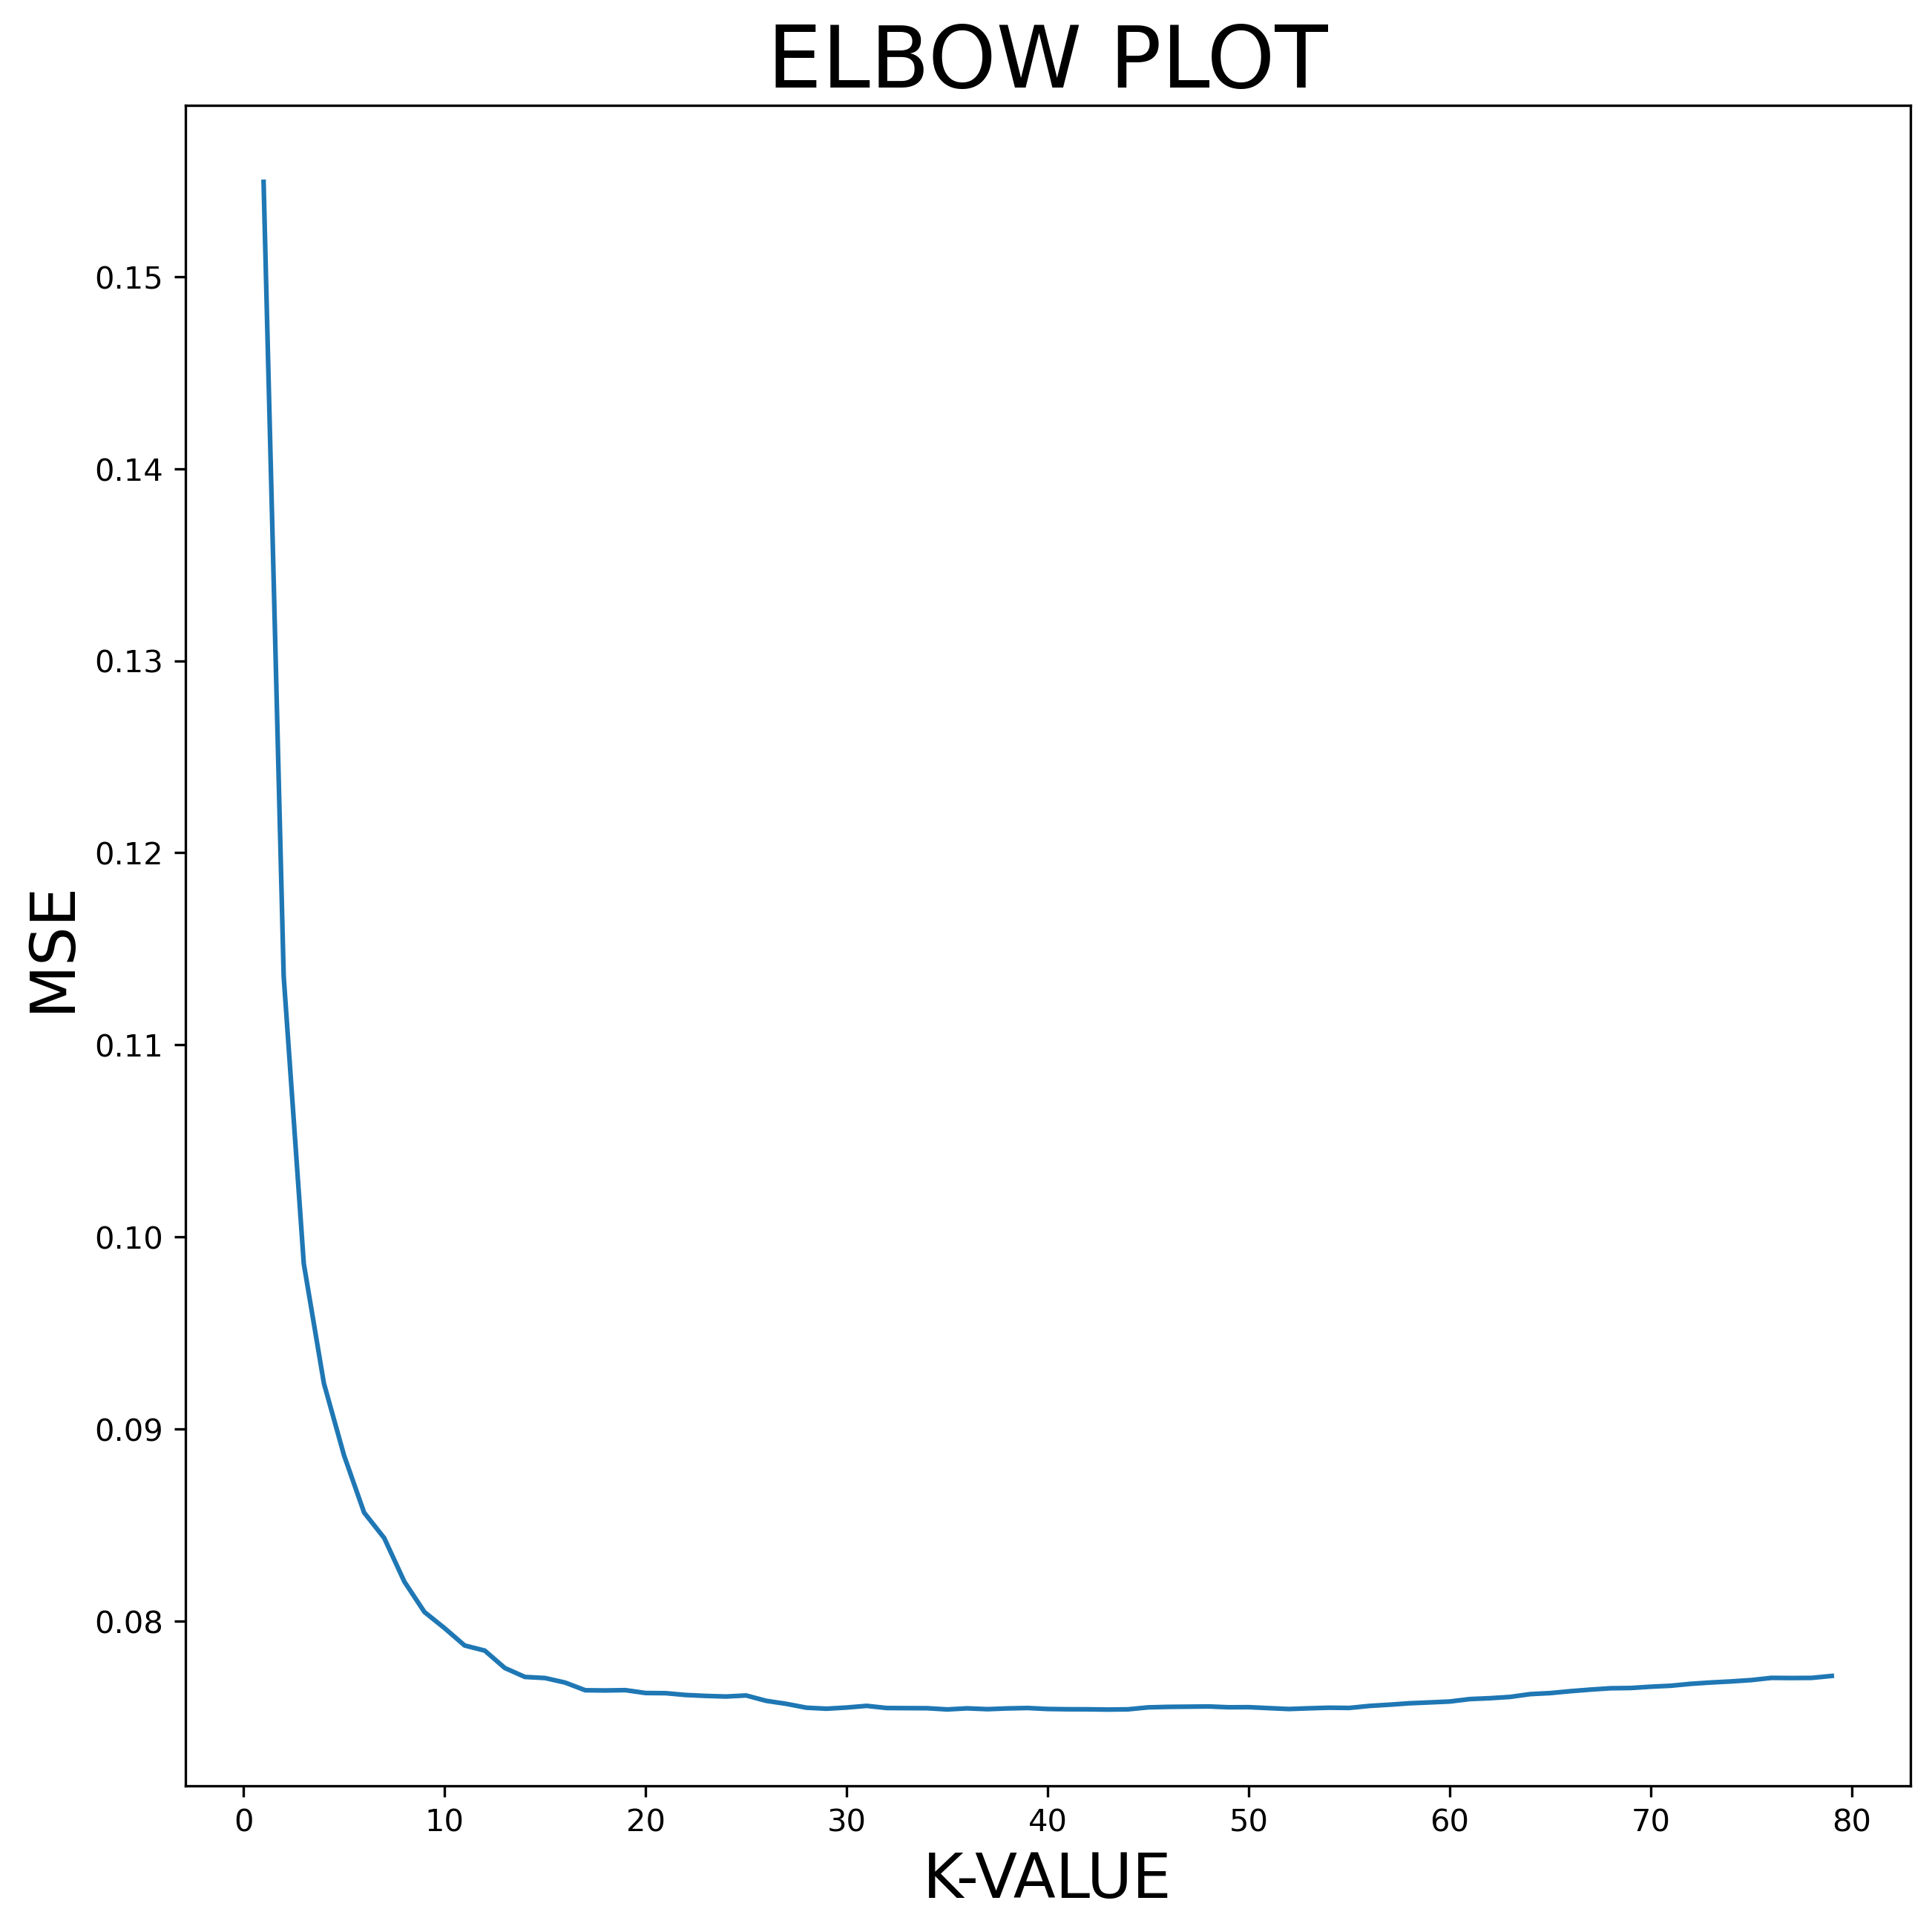

In [21]:
fig,ax=plt.subplots(figsize=(10,10), dpi=300)
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(Xtrain,ytrain)
    y_knn_pred=model_knn.predict(Xtest)
#Storing MSE 
    mse=mean_squared_error(ytest,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)
plt.savefig('Elbowplot.jpeg',bbox_inches='tight' )
plt.savefig('Elbowplot.eps',bbox_inches='tight' )

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor
greg=knn(n_neighbors=8)
greg.fit(Xtrain,ytrain)



KNeighborsRegressor(n_neighbors=8)

In [41]:
y_pred = greg.predict(Xtrain)

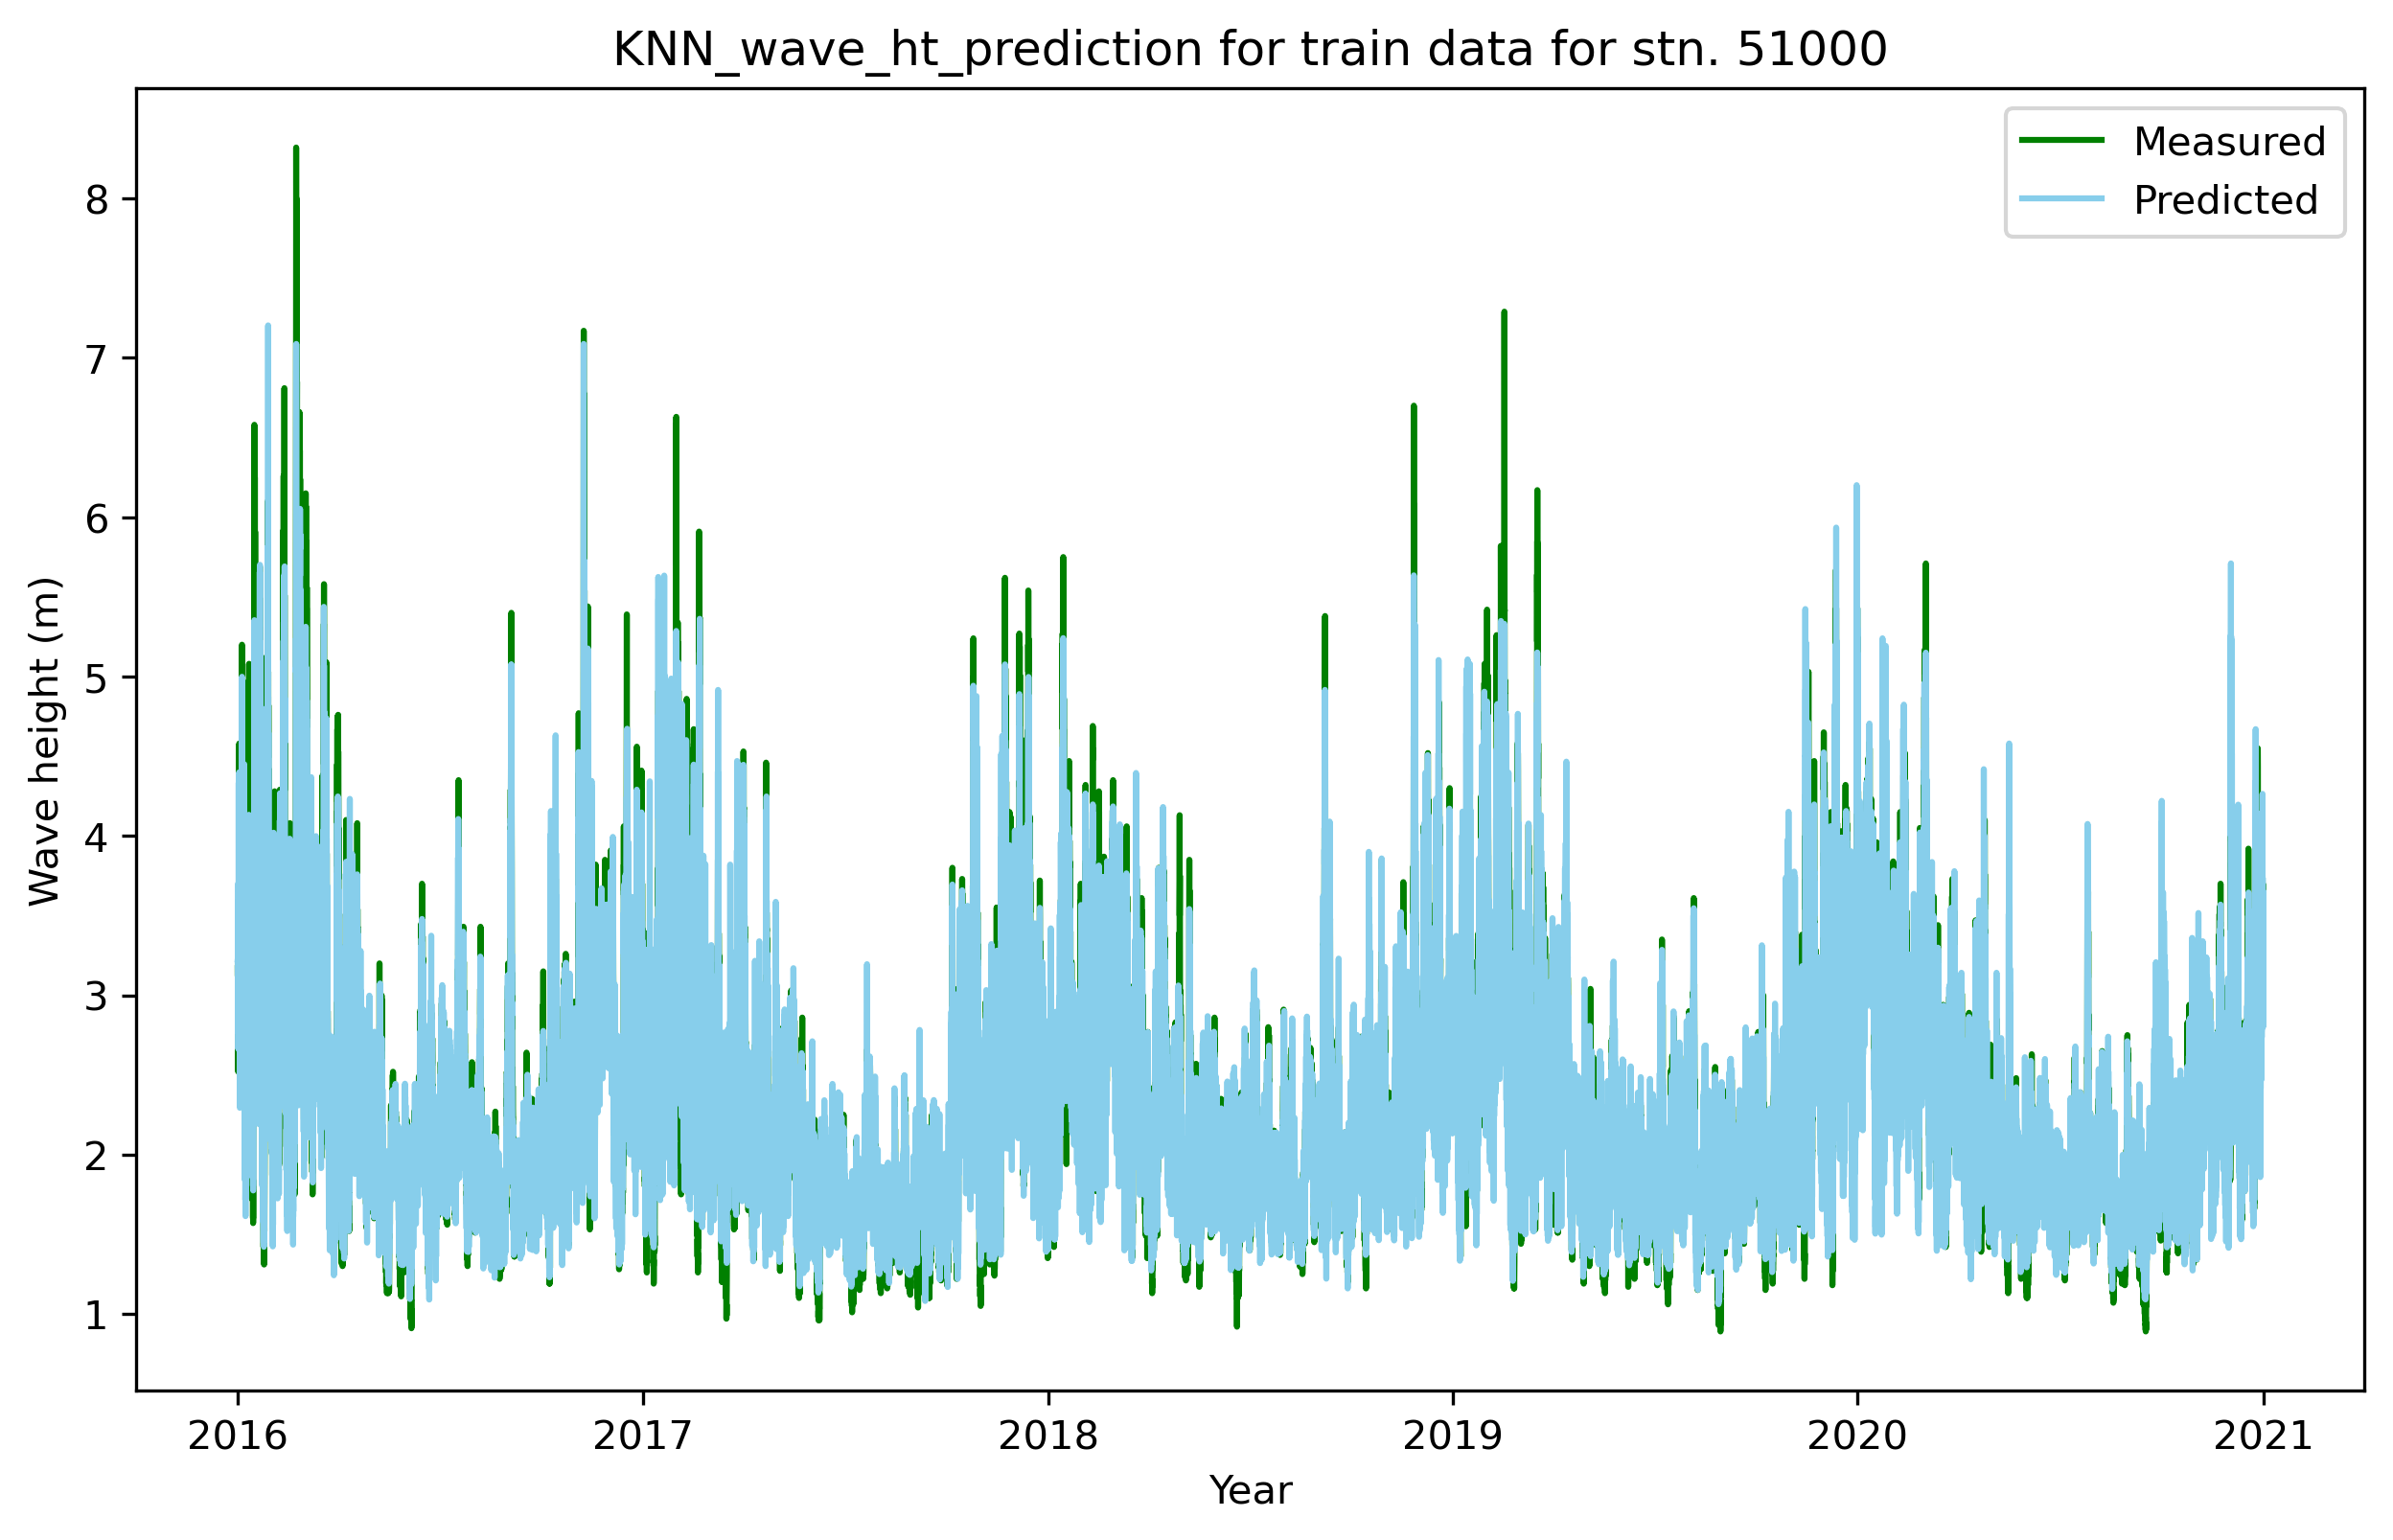

In [42]:
fig = plt.figure(figsize=(10, 6), dpi=300)
plt.plot(train['Date'], ytrain.ravel(), label='Measured', color='green')
plt.plot(train['Date'],y_pred, label='Predicted', color='skyblue')
#plt.plot(y_pred, color='green', label='predicted')
plt.title('KNN_wave_ht_prediction for train data for stn. 51000')
plt.xlabel('Year')
plt.ylabel('Wave height (m)')
plt.legend(loc='upper right')
plt.savefig('KNN_Train.jpeg', bbox_inches='tight')

In [43]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.8573561996454369

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred))

0.29405687456314283

In [45]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrain,y_pred)

0.09172654668351393

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytrain,y_pred)

0.20501188765736178

In [47]:
ytest_pred=greg.predict(Xtest)

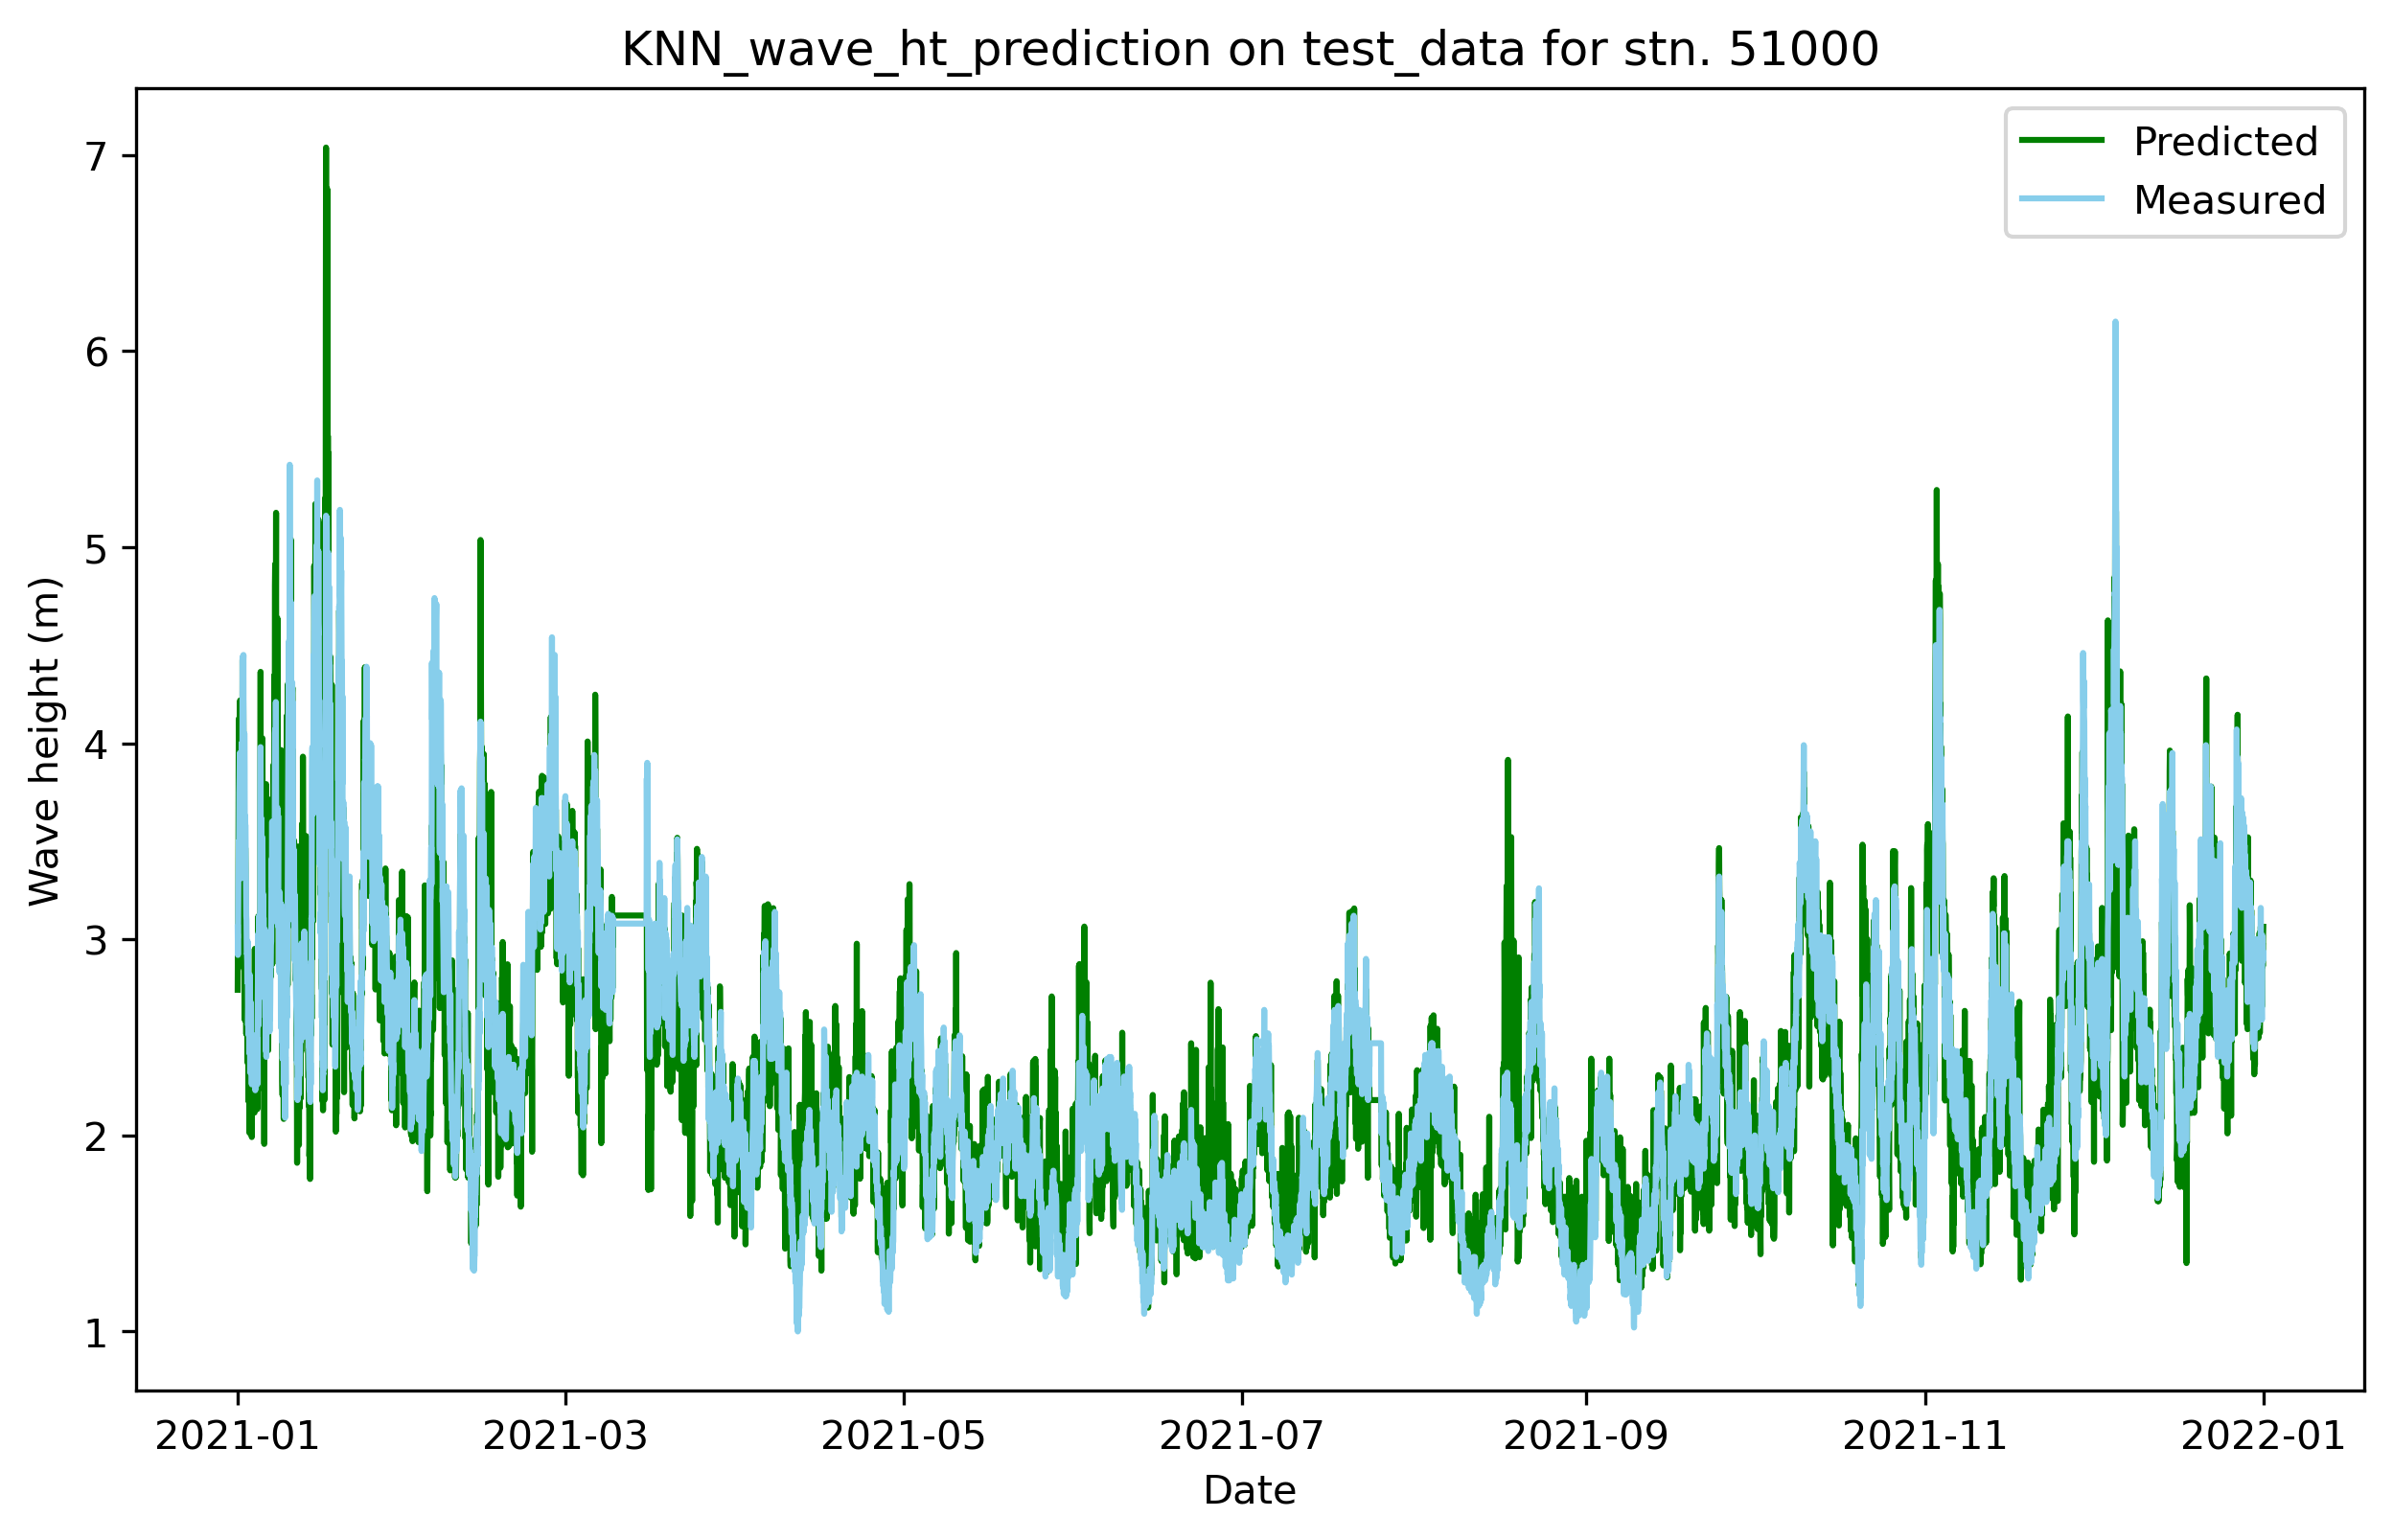

In [48]:
fig = plt.figure(figsize=(10, 6), dpi=300)
plt.plot(test['Date'],ytest_pred, label='Predicted', color='green')
plt.plot(test['Date'], ytest, label='Measured', color='skyblue')


#plt.plot(y_pred, color='green', label='predicted')
plt.title('KNN_wave_ht_prediction on test_data for stn. 51000')
plt.xlabel('Date')
plt.ylabel('Wave height (m)')
plt.legend(loc='upper right')
plt.savefig('KNN_Test.jpeg', bbox_inches='tight')


In [49]:
from sklearn.metrics import r2_score
r2_score(ytest,ytest_pred)

0.8284034684016115

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,ytest_pred))

0.2864464316747166

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest,ytest_pred)

0.09458351506037013

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ytest_pred)

0.2066155821917808

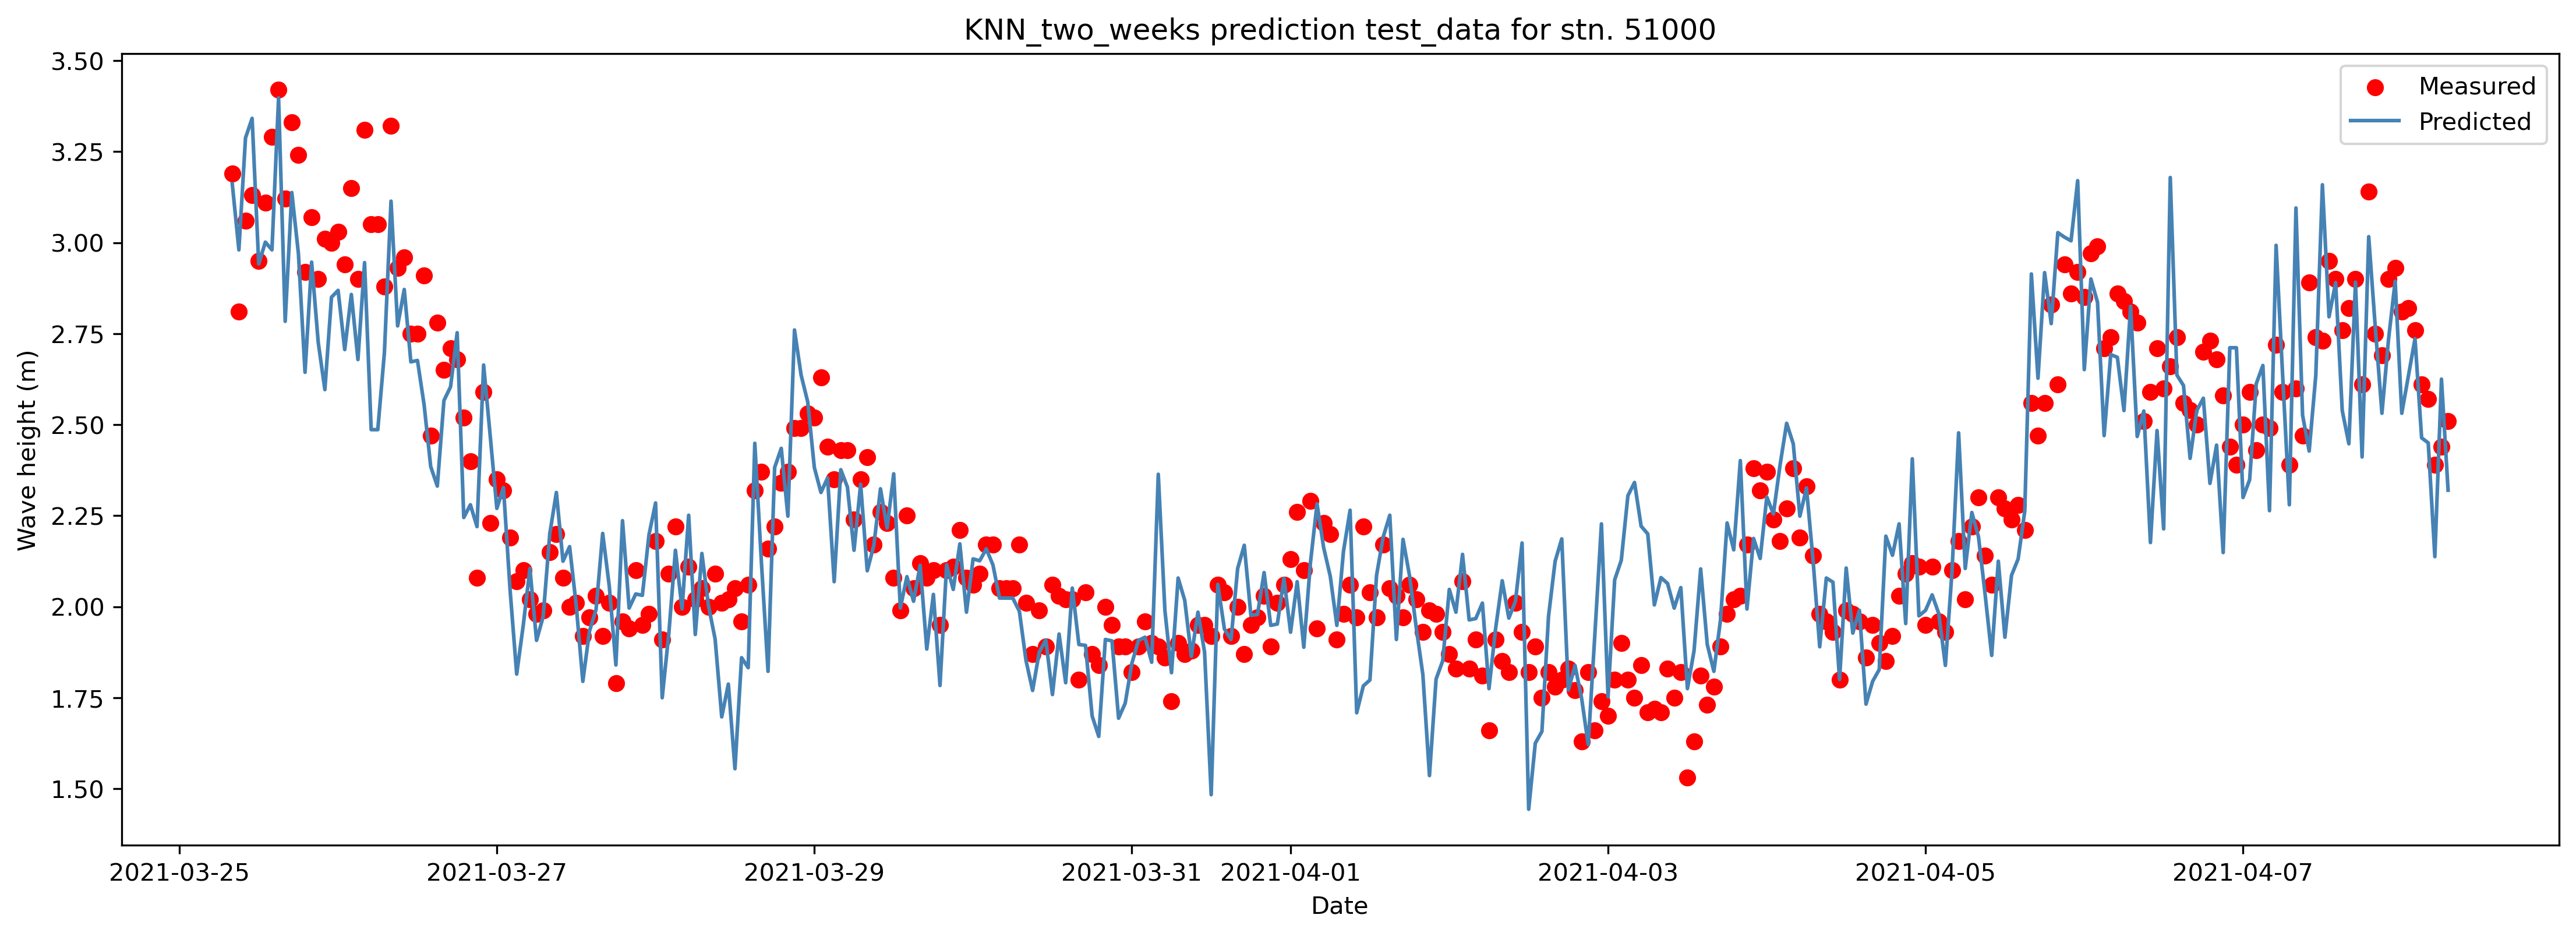

In [53]:
fig = plt.figure(figsize=(18, 6), dpi=300)

plt.scatter(test['Date'][2000:2336],ytest[2000:2336], label='Measured', color='red')
plt.plot(test['Date'][2000:2336],ytest_pred[2000:2336], label='Predicted', color='steelblue')
plt.title('KNN_two_weeks prediction test_data for stn. 51000')
plt.xlabel('Date')
plt.ylabel('Wave height (m)')
plt.legend(loc='upper right')
plt.savefig('KNN_twoweek.jpeg', bbox_inches='tight')

In [36]:
ytest_pred=pd.DataFrame(ytest_pred)

In [37]:
ytest_pred

,0
0,2.74250
1,3.00000
2,2.85000
3,3.42250
4,3.83000
...,...
8755,2.91125
8756,2.98125
8757,2.86250
8758,3.00500


In [38]:
ytest_pred.to_excel("Wave_ht_KNN_51000.xlsx")